In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tf

In [2]:
data = pd.read_csv("insurance.csv")
data_encoded = pd.get_dummies(data=data, prefix=['sex', 'child', 'region', 'smoker'], prefix_sep='_', columns=["sex", "children", "region", "smoker"], drop_first=True, dtype='int8')
data_encoded.head()

,age,bmi,charges,sex_male,child_1,child_2,child_3,child_4,child_5,region_northwest,region_southeast,region_southwest,smoker_yes
0,19,27.900,16884.92400,0,0,0,0,0,0,0,0,1,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,1,0,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,1,0,0
3,33,22.705,21984.47061,1,0,0,0,0,0,1,0,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,1,0,0,0


In [3]:
# log norm
data_encoded.charges = np.log(data_encoded.charges)
data_encoded.head()

,age,bmi,charges,sex_male,child_1,child_2,child_3,child_4,child_5,region_northwest,region_southeast,region_southwest,smoker_yes
0,19,27.900,9.734176,0,0,0,0,0,0,0,0,1,1
1,18,33.770,7.453302,1,1,0,0,0,0,0,1,0,0
2,28,33.000,8.400538,1,0,0,1,0,0,0,1,0,0
3,33,22.705,9.998092,1,0,0,0,0,0,1,0,0,0
4,32,28.880,8.260197,1,0,0,0,0,0,1,0,0,0


In [4]:
x = data_encoded.drop(['charges'], axis=1)
y = data.charges
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [5]:
model = tf.keras.Sequential([
	tf.keras.layers.Dense(500, activation='relu'),
	tf.keras.layers.Dense(500, activation='relu'),
	tf.keras.layers.Dense(500, activation='relu'),
	tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss=tf.keras.losses.mse)
model.fit(x_train, y_train, epochs=200)



Epoch 1/200



32/32 [==============================] - 2s 5ms/step - loss: 308971712.0000
Epoch 2/200
32/32 [==============================] - 0s 5ms/step - loss: 150923344.0000
Epoch 3/200
32/32 [==============================] - 0s 5ms/step - loss: 134485472.0000
Epoch 4/200
32/32 [==============================] - 0s 5ms/step - loss: 133149008.0000
Epoch 5/200
32/32 [==============================] - 0s 5ms/step - loss: 132508216.0000
Epoch 6/200
32/32 [==============================] - 0s 5ms/step - loss: 131172544.0000
Epoch 7/200
32/32 [==============================] - 0s 5ms/step - loss: 129883072.0000
Epoch 8/200
32/32 [==============================] - 0s 5ms/step - loss: 129456512.0000
Epoch 9/200
32/32 [==============================] - 0s 5ms/step - loss: 127565512.0000
Epoch 10/200
32/32 [==============================] - 0s 5ms/step - loss: 125642216.0000
Epoch 11/200
32/32 [==============================] - 0s 5ms/step - loss: 124664344.0000
Epoch 12/200
32/32 [======================

In [6]:
model.evaluate(x_test, y_test)

11/11 [==============================] - 0s 2ms/step - loss: 21353286.0000


21353286.0

11/11 [==============================] - 0s 2ms/step
R2 Accuracy: 0.8351481126818772


[Text(0.5, 0, 'Predicted Charges'),
 Text(0, 0.5, 'Actual Charges'),
 Text(0.5, 1.0, 'Test alignment')]

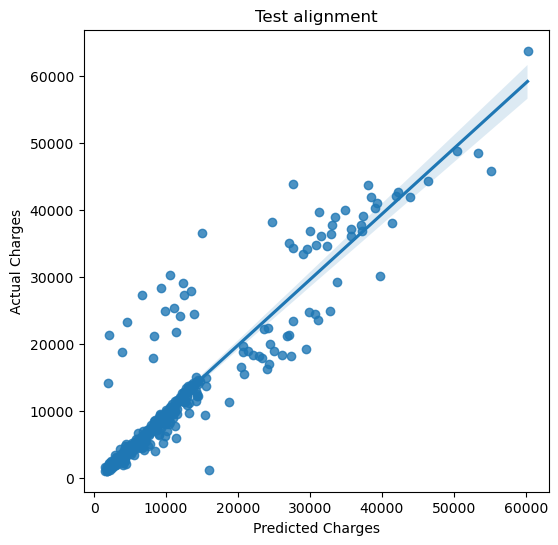

In [22]:
y_pred = model.predict(x_test)
print(f"R2 Accuracy: {r2_score(y_test, y_pred)}")

fig, ax = plt.subplots(1,1,figsize=(6,6))
sns.regplot(x=y_pred[:,0], y=y_test, ax=ax)
ax.set(xlabel="Predicted Charges", ylabel="Actual Charges", title="Test alignment")